# Generate the initial dataset

In [2]:
from generate_dataset import create_dataset
X, y = create_dataset(1000)

# Spit Dataset into training and testing

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normilize the data with StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[1]))
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[1]))

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")
print(X_train[:5])

Training set shape: (800, 50), Test set shape: (200, 50)
[[ 0.37523911  0.40793165  0.23597626  0.37552626  0.14465571  0.27274617
   0.28315054  0.2267013   0.17483204  0.28041255  0.27936597  0.35053707
   0.23548174  0.28190248  0.17714117  0.25190858  0.34209655  0.50709758
   0.27109065  0.26531868  0.25873853  0.20306934  0.20273211  0.25649335
   0.21295973  0.41552863  0.16916562  0.25079491  0.3471063   0.11630049
   0.27916163  0.2767796   0.31749687  0.16857689  0.23921474  0.21477458
   0.33705542  0.21795564  0.20735398  0.24442702  0.25311827  0.31435904
   0.19408365  0.2396765   0.09812061  0.29685463  0.12377204  0.21416073
   0.13958995  0.24089236]
 [ 0.24733225  0.3666534   0.28741563  0.36232507  0.3242297   0.34384426
   0.2620083   0.25637587  0.39825616  0.38313163  0.28372583  0.39901674
   0.35928264  0.46059807  0.45874126  0.36777923  0.32170121  0.46473275
   0.3020985   0.57299523  0.31140805  0.44081127  0.24087435  0.44683994
   0.43101654  0.48946819  0

# Train the classification model

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        50

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[55  0  0  0]
 [ 0 44  0  0]
 [ 0  0 51  0]
 [ 0  0  0 50]]


# Visualize the confusion matrix

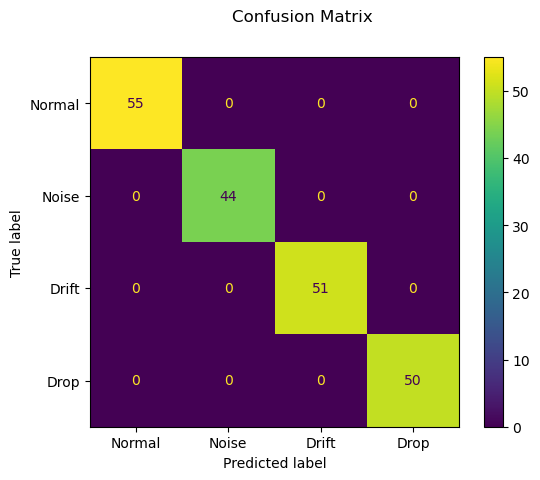

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["Normal", "Noise", "Drift", "Drop"])
disp.figure_.suptitle("Confusion Matrix")
plt.show()


# LSTM Model


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(4, activation='softmax') #layer outputs probabilities for each of the four classes.
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the LSTM model
lstm_loss, lstm_acc = model.evaluate(X_test_lstm, y_test)
print(f"LSTM Model Accuracy: {lstm_acc}")


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4417 - loss: 1.3336 - val_accuracy: 0.6625 - val_loss: 1.1290
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7270 - loss: 1.2605 - val_accuracy: 0.7188 - val_loss: 0.8475
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7509 - loss: 0.7932 - val_accuracy: 0.7188 - val_loss: 0.7757
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7223 - loss: 0.8614 - val_accuracy: 0.6875 - val_loss: 0.9668
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7484 - loss: 0.8623 - val_accuracy: 0.7188 - val_loss: 0.7110
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7173 - loss: 0.8355 - val_accuracy: 0.7250 - val_loss: 0.7191
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7687 - loss: 0.6802 - val_accuracy: 0.7250 - val_loss: 0.6997
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7677 - loss: 0.6442 - val_accuracy: 0.7250 - v

# Make Predictions
Use the trained model to predict the class probabilities for the test data (X_test_lstm).
The output of model.predict() will be a matrix where each row represents a probability distribution across the four classes.

In [25]:
import numpy as np

# Predict class probabilities
predictions = model.predict(X_test_lstm)
print(predictions[:5])
# Get the predicted class for each sequence
predicted_classes = np.argmax(predictions, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[0.00582039 0.526873   0.4399179  0.02738868]
 [0.1125955  0.09500737 0.12245877 0.6699384 ]
 [0.24596797 0.16226733 0.5283678  0.06339682]
 [0.08309057 0.08239404 0.09852804 0.7359873 ]
 [0.24668136 0.16004759 0.5317661  0.06150496]]


# Define Anomaly Criteria
Direct Classification: If a sequence is classified into one of the anomaly classes (e.g., classes 1, 2, or 3), it is flagged as anomalous.
Low Confidence Threshold: If the model's confidence (highest probability) is below a defined threshold, treat the sequence as anomalous (even if classified as normal).


In [28]:
# Define a threshold for confidence
confidence_threshold = 0.7  # Adjust based on your dataset

# Identify low-confidence predictions
anomalous_sequences = []
for i, prediction in enumerate(predictions):
    max_confidence = np.max(prediction)
    predicted_class = np.argmax(prediction)
    if predicted_class != 0 or max_confidence < confidence_threshold:
        anomalous_sequences.append((i, predicted_class, max_confidence))

# Output anomalies
print(f"Anomalous Sequences: {anomalous_sequences}")


Anomalous Sequences: [(0, 1, 0.526873), (1, 3, 0.6699384), (2, 2, 0.5283678), (3, 3, 0.7359873), (4, 2, 0.5317661), (5, 1, 1.0), (6, 0, 0.38059703), (7, 3, 0.66744107), (8, 2, 0.543093), (9, 0, 0.38209882), (10, 2, 0.36986867), (11, 3, 0.6548144), (12, 3, 0.58680916), (13, 0, 0.37656638), (14, 0, 0.38295904), (15, 2, 0.5158968), (16, 2, 0.5305497), (17, 2, 0.5473438), (18, 1, 0.7528808), (19, 2, 0.6188754), (20, 3, 0.73832804), (21, 3, 0.66460985), (22, 0, 0.37067097), (23, 0, 0.37934914), (24, 2, 0.5363835), (25, 1, 1.0), (26, 2, 0.3756055), (27, 0, 0.37675366), (28, 1, 0.99915135), (29, 0, 0.37654173), (30, 0, 0.38017586), (31, 3, 0.64406186), (32, 0, 0.37327155), (33, 1, 1.0), (34, 1, 0.999998), (35, 1, 1.0), (36, 3, 0.6507551), (37, 2, 0.52690905), (38, 0, 0.37380728), (39, 3, 0.63907844), (40, 0, 0.37623197), (41, 1, 1.0), (42, 2, 0.54799575), (43, 3, 0.6938464), (44, 2, 0.53122056), (45, 2, 0.5158112), (46, 0, 0.37312675), (47, 2, 0.53644216), (48, 3, 0.62192315), (49, 1, 0.91163

# Evaluate Performance
Compare the detected anomalies (predicted_classes) with the ground truth labels (y_test) to calculate detection metrics like precision, recall, and F1-score.

In [26]:
from sklearn.metrics import classification_report

# Generate a classification report
print("Classification Report:\n", classification_report(y_test, predicted_classes))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        55
           1       1.00      0.91      0.95        44
           2       0.81      1.00      0.89        51
           3       1.00      1.00      1.00        50

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



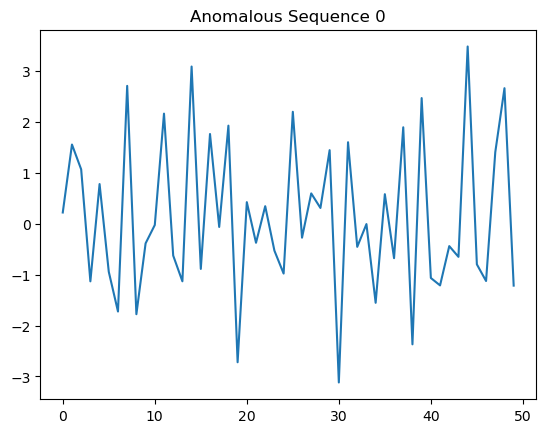

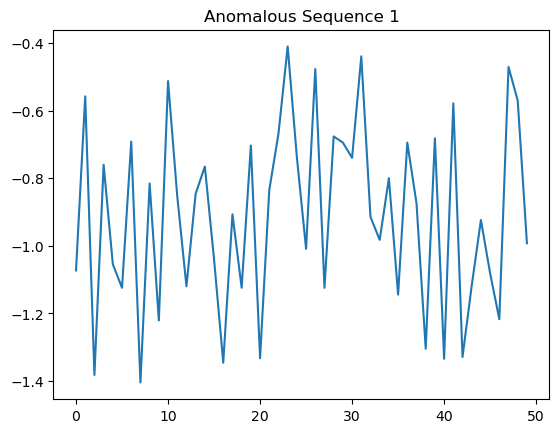

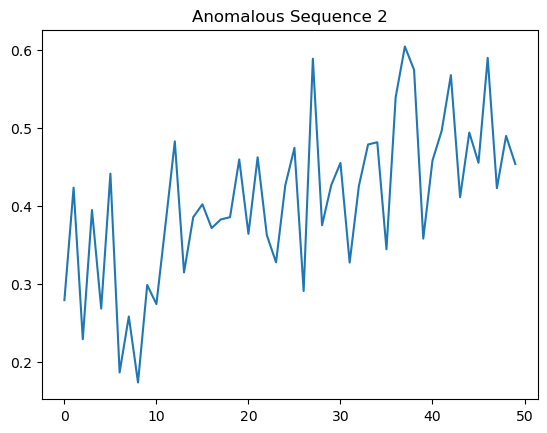

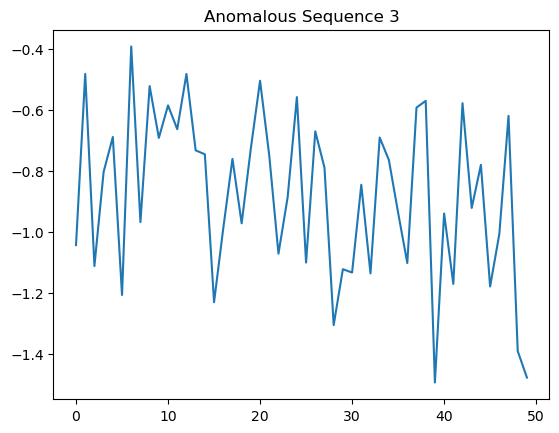

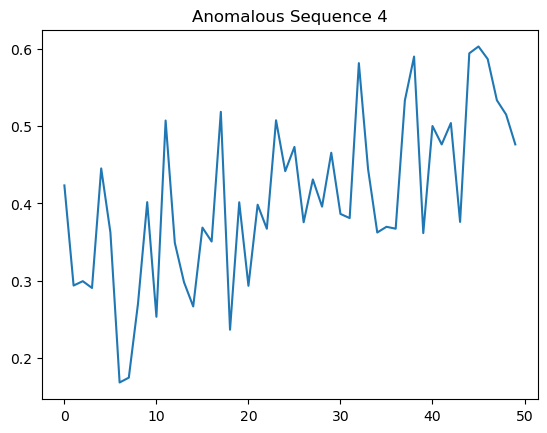

In [29]:
import matplotlib.pyplot as plt

# Visualize some anomalous sequences
for idx, _, _ in anomalous_sequences[:5]:  # Limit to 5 for display
    plt.plot(X_test[idx])
    plt.title(f"Anomalous Sequence {idx}")
    plt.show()


To reconstruct the input data is usefull to use an autoencoder model. An autoencoder learns to compress and reconstruct input sequences. Normal sequences are reconstructed well, while anomalies show higher reconstruction errors.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# Define LSTM Autoencoder
autoencoder = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=False),
    RepeatVector(X_train.shape[1]),
    LSTM(50, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


C:\Users\davib\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 50, 1)          │            51 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Reshape data for LSTM input
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [33]:
# Train the autoencoder# Train the Autoencoder
history = autoencoder.fit(
    X_train_lstm, X_train_lstm,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.9285 - val_loss: 0.7326
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7376 - val_loss: 0.7041
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6544 - val_loss: 0.6927
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7538 - val_loss: 0.6893
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6874 - val_loss: 0.6860
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7102 - val_loss: 4.4586
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8017 - val_loss: 0.7167
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7349 - val_loss: 0.7001
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7770 - val_loss: 0.6894
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7049 - val_loss: 0.6881
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6986 - val_loss: 0.6876
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6

In [34]:
# Predict on the test set
X_test_pred = autoencoder.predict(X_test_lstm)

# Calculate Mean Squared Error for each sequence
reconstruction_errors = ((X_test_lstm - X_test_pred) ** 2).mean(axis=(1, 2))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


In [35]:
# Set a threshold (e.g., 95th percentile of training errors)
threshold = np.percentile(reconstruction_errors, 95)

# Identify anomalies
anomalies = reconstruction_errors > threshold
print(f"Number of anomalies detected: {np.sum(anomalies)}")

Number of anomalies detected: 10


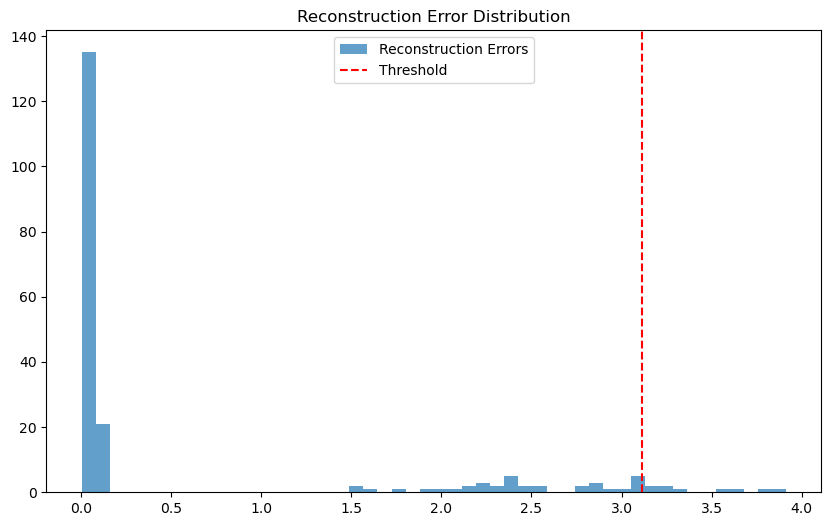

In [36]:
import matplotlib.pyplot as plt

# Plot reconstruction errors
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors, bins=50, alpha=0.7, label='Reconstruction Errors')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate binary anomaly labels
predicted_labels = anomalies.astype(int)

# Evaluate
print("Classification Report:\n", classification_report(y_test, predicted_labels))


Classification Report:
               precision    recall  f1-score   support

           0       0.29      1.00      0.45        55
           1       1.00      0.23      0.37        44
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        50

    accuracy                           0.33       200
   macro avg       0.32      0.31      0.20       200
weighted avg       0.30      0.33      0.20       200



C:\Users\davib\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\davib\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\davib\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Deploy the model

In [21]:
import joblib

# Save the Random Forest model
joblib.dump(clf, 'anomaly_classifier.pkl')
print("Model saved as 'anomaly_classifier.pkl'")


Model saved as 'anomaly_classifier.pkl'
